In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
olist_marketing_qualified_leads   = pd.read_csv(r'C:\Users\91892\Downloads\olist_marketing_qualified_leads_dataset.csv')
olist_closed_deals 				  = pd.read_csv(r'C:\Users\91892\Downloads\olist_closed_deals_dataset.csv')

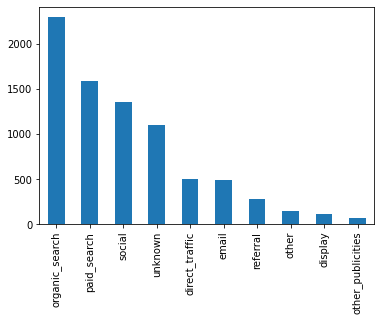

In [3]:
a=olist_marketing_qualified_leads['origin'].value_counts().plot.bar()

In [4]:
olist_marketing_qualified_leads.isnull().sum()

mql_id                 0
first_contact_date     0
landing_page_id        0
origin                60
dtype: int64

In [5]:
olist_marketing_qualified_leads.head(5)

,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search


In [6]:
olist_marketing_qualified_leads['first_contact_date_mnth'] = olist_marketing_qualified_leads['first_contact_date'].apply(lambda x:x.split("-")[1]) 
olist_marketing_qualified_leads['first_contact_date_yr'] = olist_marketing_qualified_leads['first_contact_date'].apply(lambda x:x.split("-")[0]) 
olist_marketing_qualified_leads['first_contact_date_mnth']=olist_marketing_qualified_leads['first_contact_date_mnth'].astype('int')
olist_marketing_qualified_leads['first_contact_date_yr']=olist_marketing_qualified_leads['first_contact_date_yr'].astype('int')

olist_marketing_qualified_leads.info()

<AxesSubplot:>

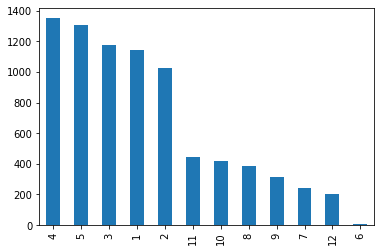

In [8]:
olist_marketing_qualified_leads['first_contact_date_mnth'].value_counts().plot.bar()

<AxesSubplot:>

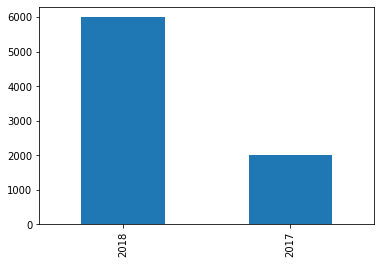

In [9]:
olist_marketing_qualified_leads['first_contact_date_yr'].value_counts().plot.bar()

In [10]:
olist_marketing_qualified_leads.head(5)

,mql_id,first_contact_date,landing_page_id,origin,first_contact_date_mnth,first_contact_date_yr
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social,2,2018
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search,10,2017
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search,3,2018
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email,1,2018
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search,2,2018


In [13]:
y = pd.get_dummies(olist_marketing_qualified_leads.origin, prefix='Country')
y.info()
#y.value_counts().plot.barh()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Country_direct_traffic     8000 non-null   uint8
 1   Country_display            8000 non-null   uint8
 2   Country_email              8000 non-null   uint8
 3   Country_organic_search     8000 non-null   uint8
 4   Country_other              8000 non-null   uint8
 5   Country_other_publicities  8000 non-null   uint8
 6   Country_paid_search        8000 non-null   uint8
 7   Country_referral           8000 non-null   uint8
 8   Country_social             8000 non-null   uint8
 9   Country_unknown            8000 non-null   uint8
dtypes: uint8(10)
memory usage: 78.2 KB


In [14]:
#np.where(olist_marketing_qualified_leads[])

In [15]:
olist_closed_deals.columns

Index(['mql_id', 'seller_id', 'sdr_id', 'sr_id', 'won_date',
       'business_segment', 'lead_type', 'lead_behaviour_profile',
       'has_company', 'has_gtin', 'average_stock', 'business_type',
       'declared_product_catalog_size', 'declared_monthly_revenue'],
      dtype='object')

In [16]:
olist_marketing_qualified_leads.columns

Index(['mql_id', 'first_contact_date', 'landing_page_id', 'origin',
       'first_contact_date_mnth', 'first_contact_date_yr'],
      dtype='object')

In [26]:
mrg_clos_lead = olist_marketing_qualified_leads.merge(olist_closed_deals, on='mql_id', how='left')

In [27]:
for i in  mrg_clos_lead.columns :  
    print("Column {} :: {} ".format(i,round(mrg_clos_lead.isnull().sum()[i]/mrg_clos_lead.count().max() *100,2)))

Column mql_id :: 0.0 
Column first_contact_date :: 0.0 
Column landing_page_id :: 0.0 
Column origin :: 0.75 
Column first_contact_date_mnth :: 0.0 
Column first_contact_date_yr :: 0.0 
Column seller_id :: 89.48 
Column sdr_id :: 89.48 
Column sr_id :: 89.48 
Column won_date :: 89.48 
Column business_segment :: 89.49 
Column lead_type :: 89.55 
Column lead_behaviour_profile :: 91.69 
Column has_company :: 99.21 
Column has_gtin :: 99.2 
Column average_stock :: 99.18 
Column business_type :: 89.6 
Column declared_product_catalog_size :: 99.14 
Column declared_monthly_revenue :: 89.48 


In [30]:
mrg_clos_lead['seller_id'].fillna(0, inplace=True)
mrg_clos_lead['label'] =np.where(mrg_clos_lead['seller_id']==0, 0,1)

In [31]:
x= mrg_clos_lead[['first_contact_date_mnth', 'first_contact_date_yr']]
Y = mrg_clos_lead[['label']]
X=x.join(y)

In [32]:
x2 = X.join(Y)

x2.corr()

,first_contact_date_mnth,first_contact_date_yr,Country_direct_traffic,Country_display,Country_email,Country_organic_search,Country_other,Country_other_publicities,Country_paid_search,Country_referral,Country_social,Country_unknown,label
first_contact_date_mnth,1.000000,-0.885678,-0.014338,0.015247,0.025774,-0.029107,-0.028438,0.024784,0.011604,0.006469,0.016704,-0.004365,-0.131939
first_contact_date_yr,-0.885678,1.000000,0.007010,-0.032246,-0.027153,0.009297,0.003271,-0.024861,-0.005142,-0.003008,0.029925,-0.009201,0.140785
Country_direct_traffic,-0.014338,0.007010,1.000000,-0.031558,-0.066097,-0.163639,-0.035653,-0.023344,-0.128256,-0.049483,-0.116211,-0.102928,0.005862
Country_display,0.015247,-0.032246,-0.031558,1.000000,-0.031355,-0.077628,-0.016914,-0.011074,-0.060843,-0.023474,-0.055129,-0.048828,-0.021691
Country_email,0.025774,-0.027153,-0.066097,-0.031355,1.000000,-0.162587,-0.035424,-0.023194,-0.127432,-0.049165,-0.115464,-0.102266,-0.062484
Country_organic_search,-0.029107,0.009297,-0.163639,-0.077628,-0.162587,1.000000,-0.087701,-0.057422,-0.315488,-0.121719,-0.285859,-0.253186,0.026425
Country_other,-0.028438,0.003271,-0.035653,-0.016914,-0.035424,-0.087701,1.000000,-0.012511,-0.068738,-0.026520,-0.062283,-0.055164,-0.035398
Country_other_publicities,0.024784,-0.024861,-0.023344,-0.011074,-0.023194,-0.057422,-0.012511,1.000000,-0.045006,-0.017364,-0.040779,-0.036118,-0.017429
Country_paid_search,0.011604,-0.005142,-0.128256,-0.060843,-0.127432,-0.315488,-0.068738,-0.045006,1.000000,-0.095400,-0.224049,-0.198440,0.028683
Country_referral,0.006469,-0.003008,-0.049483,-0.023474,-0.049165,-0.121719,-0.026520,-0.017364,-0.095400,1.000000,-0.086441,-0.076561,-0.012968


<AxesSubplot:>

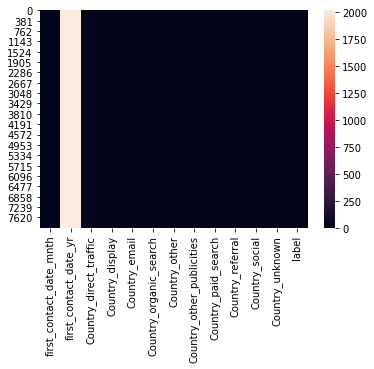

In [33]:
sns.heatmap(x2)

<AxesSubplot:xlabel='first_contact_date_yr', ylabel='label'>

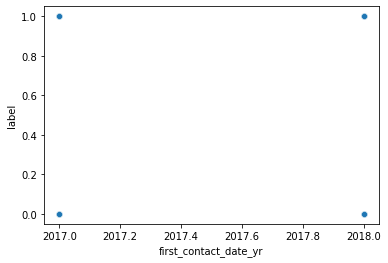

In [34]:
sns.scatterplot(    x=x2['first_contact_date_yr'],
    y=x2['label'],
    #hue=x2['first_contact_date_mnth'],
    #style=x2['first_contact_date_mnth'],
    #size=x2['first_contact_date_mnth'],
    data=x2,)

In [35]:
X.columns

Index(['first_contact_date_mnth', 'first_contact_date_yr',
       'Country_direct_traffic', 'Country_display', 'Country_email',
       'Country_organic_search', 'Country_other', 'Country_other_publicities',
       'Country_paid_search', 'Country_referral', 'Country_social',
       'Country_unknown'],
      dtype='object')

In [38]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
model = rfc() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Training Score : {}".format(model.score(X_train, y_train)))
print("Test Score : {}".format(model.score(X_test, y_test)))
print("Accuracy : {}".format(accuracy_score(y_test, y_pred, normalize= False)))
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_pred)))

C:\Users\91892\AppData\Local\Temp/ipykernel_1396/3068787747.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Training Score : 0.8923507462686567
Test Score : 0.9
Accuracy : 2376
Confusion Matrix : 
[[2375    1]
 [ 263    1]]


In [39]:
from sklearn.linear_model import LogisticRegression as LR
model = LR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Training Score : {}".format(model.score(X_train, y_train)))
print("Test Score : {}".format(model.score(X_test, y_test)))
print("Accuracy : {}".format(accuracy_score(y_test, y_pred, normalize= False)))
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_pred)))

c:\users\91892\ccdp\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Training Score : 0.8921641791044777
Test Score : 0.9
Accuracy : 2376
Confusion Matrix : 
[[2376    0]
 [ 264    0]]


In [40]:
from sklearn.tree import DecisionTreeClassifier as DR
model = DR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Training Score : {}".format(model.score(X_train, y_train)))
print("Test Score : {}".format(model.score(X_test, y_test)))
print("Accuracy : {}".format(accuracy_score(y_test, y_pred, normalize= False)))
print("Confusion Matrix : \n{}".format(confusion_matrix(y_test, y_pred)))

Training Score : 0.8923507462686567
Test Score : 0.9
Accuracy : 2376
Confusion Matrix : 
[[2375    1]
 [ 263    1]]


In [41]:
## Feature engineering